In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

import xgboost
from xgboost.sklearn import XGBClassifier

In [2]:
df = pd.read_csv('../../datasets/Fake_finder/clean_text.csv')

df.drop(columns = 'Unnamed: 0', inplace = True)

df.isna().mean()

clean_text    0.004604
label         0.000000
dtype: float64

In [3]:
df.dropna(inplace = True)

In [22]:
tf = TfidfVectorizer(max_df=0.8, min_df = 3, stop_words = 'english', ngram_range=(1,2))

X = tf.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [23]:
xgb = xgboost.XGBClassifier(max_depth=8, n_jobs = -1, verbosity=1)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
print(f'Training score is {xgb.score(X_train, y_train)}')
print(f'Test score is {xgb.score(X_test, y_test)}')

Training score is 0.983052731010724
Test score is 0.9444907484580763


In [25]:
probs = xgb.predict_proba(X)
pred_label = xgb.predict(X)

df['pred'] = pred_label


prob_true = []
prob_fake = []

for i in range(len(df.index)):
    prob_true.append(probs[i][0])
    prob_fake.append(probs[i][1])

df['prob_true'] = prob_true
df['prob_fake'] = prob_fake

In [26]:
print(f'The f1 score is {f1_score(df["label"], df["pred"])}')


print(f'The precision score is {precision_score(df["label"], df["pred"])}')


print(f'The recall score is {recall_score(df["label"], df["pred"])}')

The f1 score is 0.9541732509696883
The precision score is 0.9806584969732762
The recall score is 0.9290809903483005


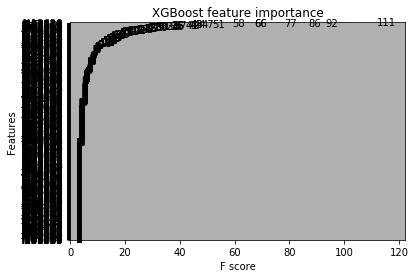

In [27]:
xgboost.plot_importance(xgb)
plt.title("XGBoost feature importance")
plt.show()